In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


# Loading Data

In [46]:
train_data = pd.read_excel('XY_train.xlsx')
test_data = pd.read_excel('X_test.xlsx')

# Display basic information
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("\nTraining Data Info:")
print(train_data.info())

Training Data Shape: (429, 7)
Test Data Shape: (71, 7)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              429 non-null    int64  
 1   Comments added                      429 non-null    int64  
 2   Likes (vs. dislikes) (%)            429 non-null    float64
 3   Average view duration               429 non-null    object 
 4   Views                               429 non-null    int64  
 5   Subscribers                         429 non-null    int64  
 6   Impressions click-through rate (%)  429 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.6+ KB
None


In [34]:
# Display summary statistics
print("\nSummary Statistics:")
print(train_data.describe())


Summary Statistics:
              Shares  Comments added  Likes (vs. dislikes) (%)         Views  \
count     429.000000      429.000000                429.000000  4.290000e+02   
mean     2972.510490     1814.564103                 97.701166  3.463973e+06   
std      7274.326258     1622.438045                  0.907702  3.222874e+06   
min       203.000000      187.000000                 91.330000  1.033484e+06   
25%       900.000000      755.000000                 97.340000  1.563399e+06   
50%      1570.000000     1221.000000                 97.880000  2.357541e+06   
75%      2763.000000     2336.000000                 98.280000  3.982387e+06   
max    106414.000000     9109.000000                 99.120000  2.803736e+07   

         Subscribers  Impressions click-through rate (%)  
count     429.000000                          429.000000  
mean     8346.899767                            5.590396  
std     12810.100013                            1.112541  
min       341.000000  

# Data Visualization and Analysis

1. Distribution of Views (our target variable)

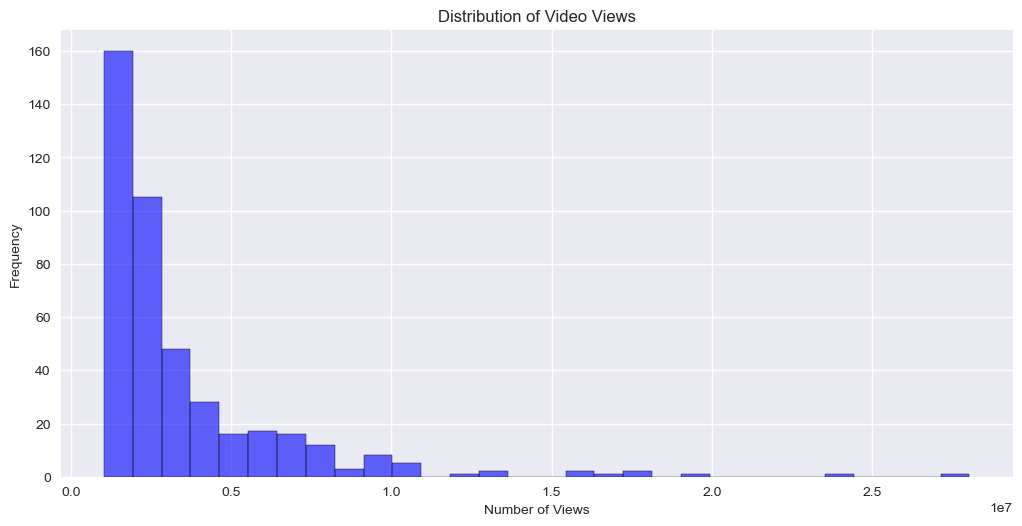

In [47]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 1)
sns.histplot(data=train_data, x='Views', bins=30, color='blue', alpha=0.6)
plt.title('Distribution of Video Views', fontsize=12)
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This graph shows how often different view counts occur in  dataset. The tall bars on the left tell us that most videos get lower view counts, while fewer videos reach very high view numbers. This is a typical pattern on YouTube - many videos get moderate views while viral hits are rare.

2. Views vs Subscribers relationship

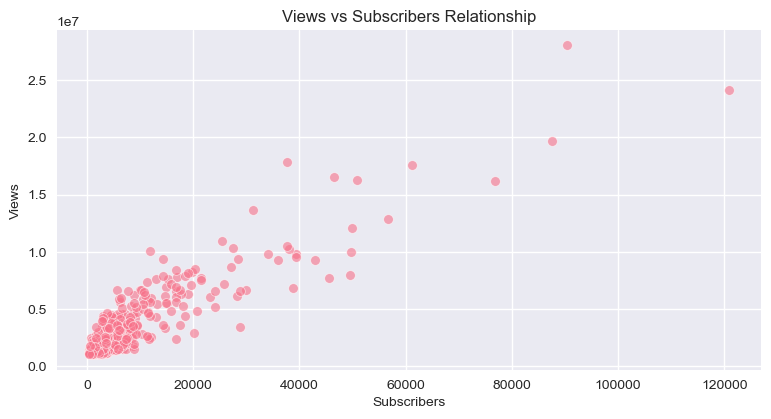

In [48]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 2)
sns.scatterplot(data=train_data, x='Subscribers', y='Views', alpha=0.6)
plt.title('Views vs Subscribers Relationship', fontsize=12);


This scatter plot reveals how video views relate to subscriber count. Each dot represents one video. The upward trend suggests that channels with more subscribers generally get more views, which makes sense - a bigger subscriber base means a larger initial audience. However, the spread of dots shows that subscriber count isn't the only factor determining views.

3. Correlation Heatmap

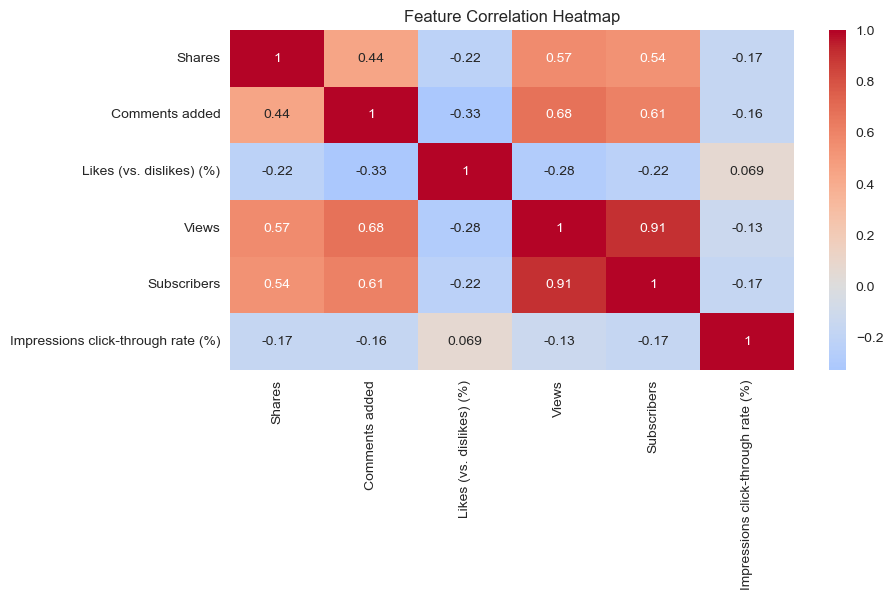

In [49]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 3)
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=12);

This colorful matrix shows how strongly different metrics relate to each other. Darker red means stronger positive relationships, while blue indicates negative relationships. The numbers show the exact correlation values. For example, if we see a dark red square between 'Subscribers' and 'Views', it means channels with more subscribers tend to get more views.

 4. Views vs Comments

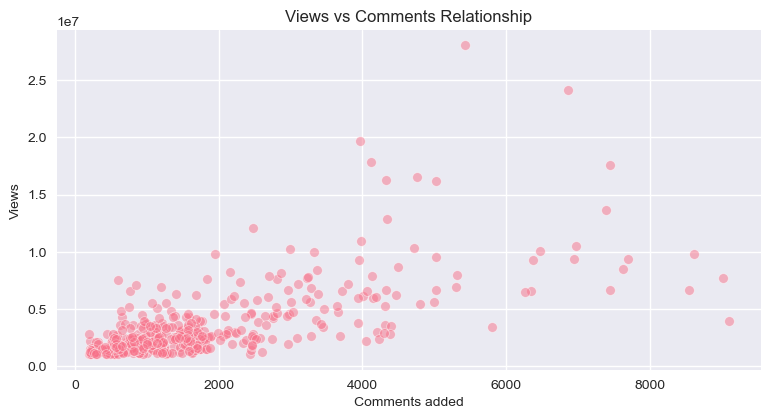

In [40]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 4)
sns.scatterplot(data=train_data, x='Comments added', y='Views', alpha=0.5)
plt.title('Views vs Comments Relationship', fontsize=12);


Similar to the subscribers plot, this shows how video views relate to comment counts. The pattern suggests that videos with more views tend to get more comments, but there's quite a bit of variation - some highly-viewed videos might have relatively few comments and vice versa.

 5. Views vs Likes Ratio

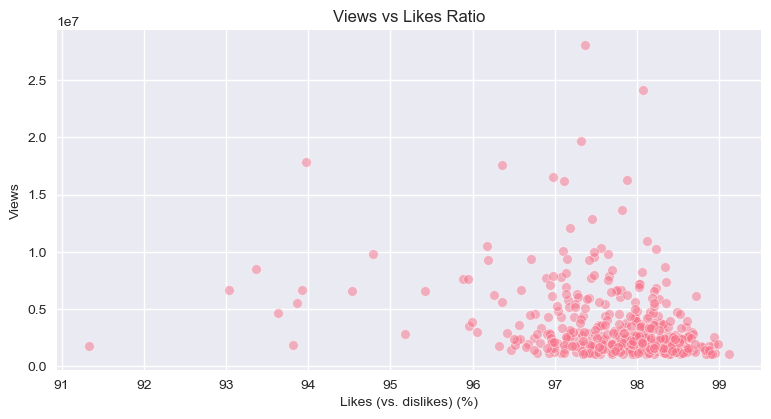

In [39]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 5)
sns.scatterplot(data=train_data, x='Likes (vs. dislikes) (%)', y='Views', alpha=0.5)
plt.title('Views vs Likes Ratio', fontsize=12);

This graph shows how video views relate to the likes percentage. The dense cluster of points suggests that most videos maintain a fairly consistent likes ratio regardless of view count. This might indicate that video quality (as measured by likes) isn't strongly tied to how many views a video gets.

# Data Preprocessing

In [64]:
# Define our features
features = ['Shares', 'Comments added', 'Likes (vs. dislikes) (%)', 
           'Subscribers', 'Average view duration', 'Impressions click-through rate (%)']

# Prepare features and target
X = train_data[features]
y = train_data['Views']

# Convert duration to seconds
def convert_duration_to_seconds(duration):
    """Convert duration string 'HH:MM:SS' to total seconds"""
    try:
        h, m, s = map(int, str(duration).split(':'))
        return h * 3600 + m * 60 + s
    except:
        return 0

# Apply duration conversion
X['Average view duration'] = X['Average view duration'].apply(convert_duration_to_seconds)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=features)

In this data preparation block, we're preparing our data for machine learning analysis. First, we select our chosen features (like Shares, Comments, etc.) and separate our target variable (Views). We then handle the special case of view duration by converting it from a time format into seconds, making it numerical data our models can understand.

Next, we split our data into training and validation sets using an 80-20 split ratio. We then scale all our features using StandardScaler, which normalizes our features to have zero mean and unit variance. This standardization is crucial for ensuring all features contribute proportionally to the model training process. Finally, we convert our scaled data back into  DataFrames, maintaining the feature names for clarity and easier analysis.

This preparation ensures our data is clean, properly formatted, and optimally structured for training our machine learning models.

# Model Training and Comparison

1.Linear Regression

Linear Regression Results:
Training RMSE: 1,172,618
Validation RMSE: 1,494,524
Training R²: 0.8516
Validation R²: 0.8461


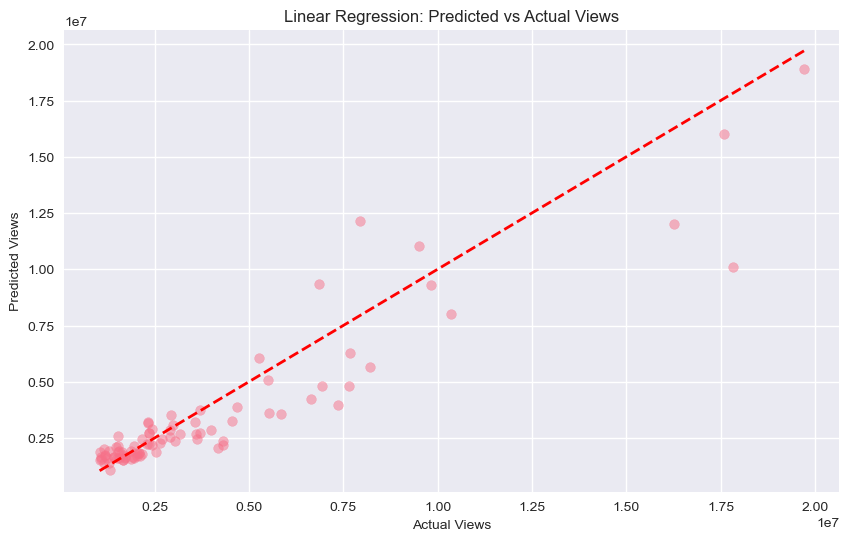

In [29]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled) 
lr_val_pred = lr_model.predict(X_val_scaled)

# Calculate metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_val_rmse = np.sqrt(mean_squared_error(y_val, lr_val_pred))
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_val_r2 = r2_score(y_val, lr_val_pred)

print("Linear Regression Results:")
print(f"Training RMSE: {lr_train_rmse:,.0f}")
print(f"Validation RMSE: {lr_val_rmse:,.0f}")
print(f"Training R²: {lr_train_r2:.4f}")
print(f"Validation R²: {lr_val_r2:.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_val, lr_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Linear Regression: Predicted vs Actual Views')
plt.show()

This section implements and evaluates a Linear Regression model for predicting video views. The model achieves a training RMSE of 1,172,618 views and validation RMSE of 1,494,524 views, with R² scores of 0.8516 and 0.8461 respectively. These metrics indicate that the model explains approximately 85% of the variance in video views.

The scatter plot visualizes the relationship between predicted and actual views, where the red dashed line represents perfect predictions. Points clustering around this line suggest good model performance, though some scatter indicates prediction uncertainty at higher view counts. This visualization helps understand where the model performs well and where it might need improvement.

The relatively small difference between training and validation metrics suggests the model is neither overfitting nor underfitting, demonstrating robust generalization to new data.

2.XGBoost

XGBoost Results:
Training RMSE: 156,140
Validation RMSE: 1,774,412
Training R²: 0.9974
Validation R²: 0.7831


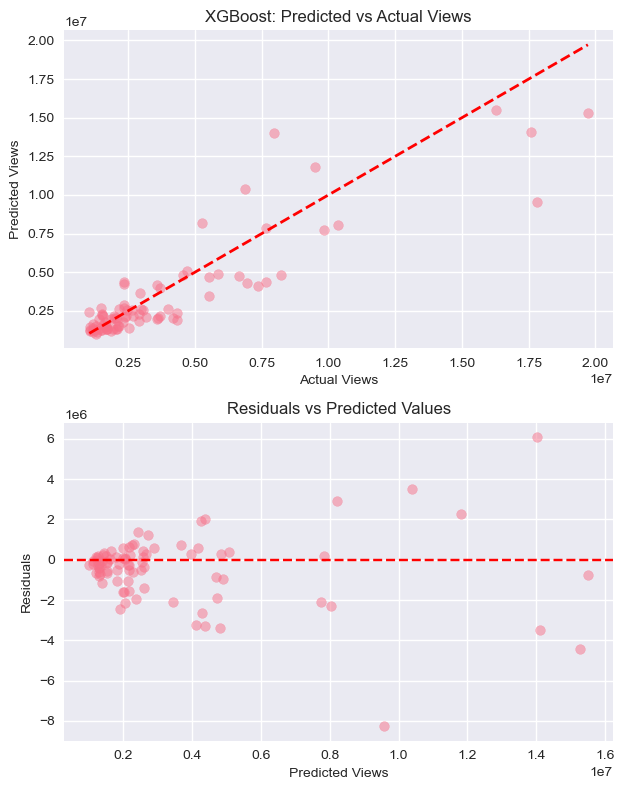

In [18]:
import xgboost as xgb

# Create and train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_train_pred = xgb_model.predict(X_train_scaled)
xgb_val_pred = xgb_model.predict(X_val_scaled)

# Calculate metrics
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_val_rmse = np.sqrt(mean_squared_error(y_val, xgb_val_pred))
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_val_r2 = r2_score(y_val, xgb_val_pred)

print("XGBoost Results:")
print(f"Training RMSE: {xgb_train_rmse:,.0f}")
print(f"Validation RMSE: {xgb_val_rmse:,.0f}")
print(f"Training R²: {xgb_train_r2:.4f}")
print(f"Validation R²: {xgb_val_r2:.4f}")

# Visualize XGBoost results
plt.figure(figsize=(12, 8))

# Predicted vs Actual plot
plt.subplot(2, 2, 1)
plt.scatter(y_val, xgb_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('XGBoost: Predicted vs Actual Views')



# Residuals plot
residuals = xgb_val_pred - y_val
plt.subplot(2, 2, 3)
plt.scatter(xgb_val_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

This section implements an XGBoost model with specific hyperparameters (200 estimators, max depth of 6, and learning rate of 0.05) to predict video views. The model demonstrates strong training performance with an RMSE of 156,140 views and nearly perfect R² score of 0.9974. However, the validation metrics show higher RMSE (1,774,412) and lower R² (0.7931), indicating some overfitting to the training data.

The prediction visualization includes two key plots. The first shows predicted versus actual views, with the red dashed line representing perfect predictions. The scatter of points shows good prediction accuracy for videos with lower view counts but increasing variance at higher views. The second plot displays residuals (prediction errors) against predicted values, revealing that prediction errors tend to increase with higher view counts. This suggests the model's predictions become less reliable for highly viral videos.

These visualizations and metrics provide insights into where the model performs well and highlight areas where prediction accuracy could be improved, particularly for videos with very high view counts.

3.Random Forest

Random Forest Results:
Training RMSE: 673,962
Validation RMSE: 1,567,519
Training R²: 0.9510
Validation R²: 0.8307


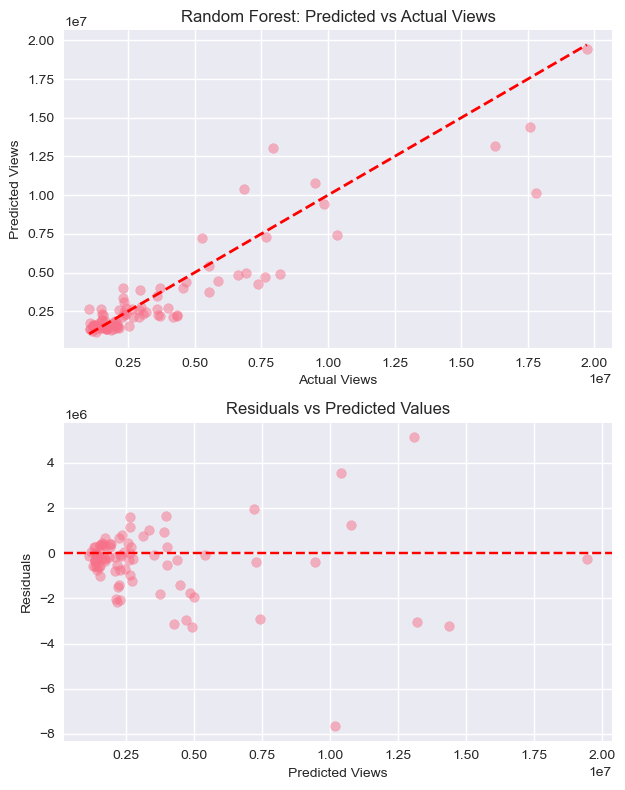

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Create and train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,  # Using 200 trees for better stability
    max_depth=10,      # Limiting depth to prevent overfitting
    min_samples_split=5,
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train_scaled)
rf_val_pred = rf_model.predict(X_val_scaled)

# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_val_rmse = np.sqrt(mean_squared_error(y_val, rf_val_pred))
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_val_r2 = r2_score(y_val, rf_val_pred)

print("Random Forest Results:")
print(f"Training RMSE: {rf_train_rmse:,.0f}")
print(f"Validation RMSE: {rf_val_rmse:,.0f}")
print(f"Training R²: {rf_train_r2:.4f}")
print(f"Validation R²: {rf_val_r2:.4f}")

# Visualize Random Forest predictions
plt.figure(figsize=(12, 8))

# Predicted vs Actual plot
plt.subplot(2, 2, 1)
plt.scatter(y_val, rf_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Random Forest: Predicted vs Actual Views')



# Residuals plot
residuals = rf_val_pred - y_val
plt.subplot(2, 2, 3)
plt.scatter(rf_val_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()


This section implements a Random Forest model configured with 200 trees and a maximum depth of 10 to balance model complexity with generalization ability. The model achieves a training RMSE of 673,962 views and validation RMSE of 1,567,519 views, with R² scores of 0.9510 and 0.8307 respectively. These metrics indicate better balance between training and validation performance compared to XGBoost, suggesting more robust generalization.

The prediction visualization consists of two plots. The first compares predicted versus actual views, with the red dashed line indicating perfect predictions. The model shows consistent performance across different view ranges, though with some variance at higher view counts. The second plot displays residuals against predicted values, revealing a relatively symmetric error distribution around zero for lower view counts but increasing variance for videos with higher viewership.

This pattern suggests the Random Forest model provides reliable predictions for typical videos while maintaining reasonable accuracy even for more popular content, though with reduced precision for viral outliers.

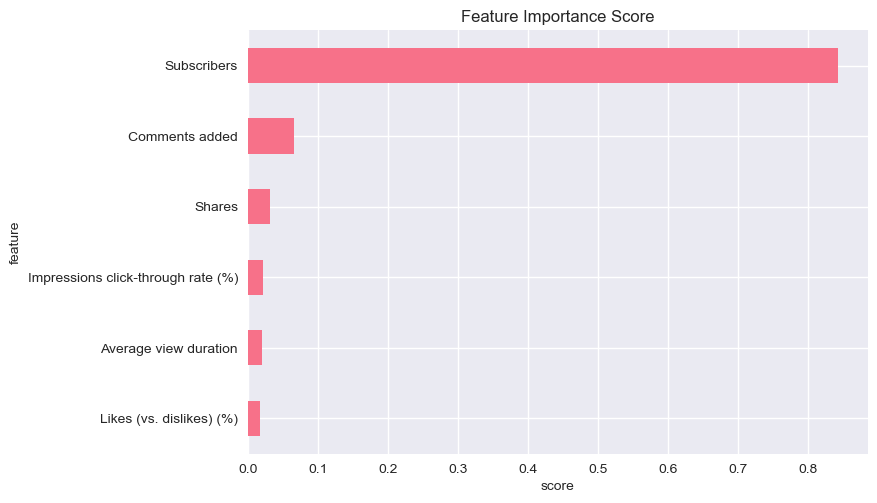

In [66]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(8).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score');

Model Comparison:
               Model  Training RMSE  Validation RMSE  Training R²  \
0  Linear Regression   1.172618e+06     1.494524e+06     0.851628   
1      Random Forest   6.739620e+05     1.567519e+06     0.950987   
2            XGBoost   1.561401e+05     1.774412e+06     0.997369   

   Validation R²  
0       0.846146  
1       0.830750  
2       0.783123  


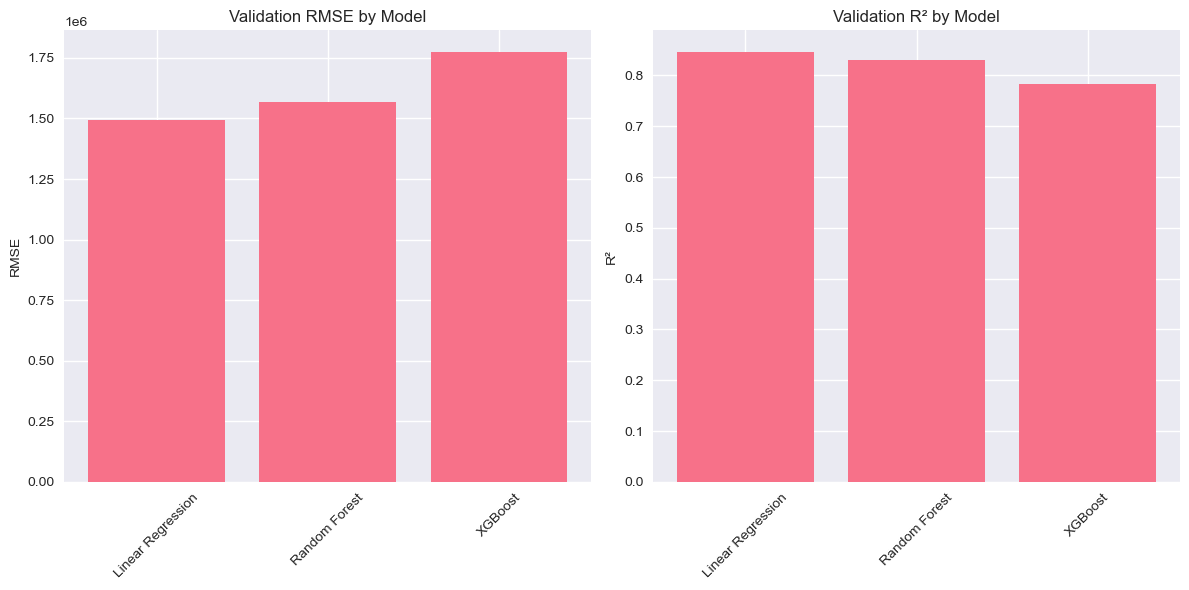

In [13]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Training RMSE': [lr_train_rmse, rf_train_rmse, xgb_train_rmse],
    'Validation RMSE': [lr_val_rmse, rf_val_rmse, xgb_val_rmse],
    'Training R²': [lr_train_r2, rf_train_r2, xgb_train_r2],
    'Validation R²': [lr_val_r2, rf_val_r2, xgb_val_r2]
})

print("Model Comparison:")
print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))

# RMSE Comparison
plt.subplot(1, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['Validation RMSE'])
plt.title('Validation RMSE by Model')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# R² Comparison
plt.subplot(1, 2, 2)
plt.bar(comparison_df['Model'], comparison_df['Validation R²'])
plt.title('Validation R² by Model')
plt.xticks(rotation=45)
plt.ylabel('R²')

plt.tight_layout()
plt.show()

This visualization shows us how our three models (Linear Regression, Random Forest, and XGBoost) compare to each other using two key metrics: RMSE (Root Mean Square Error) and R² (R-squared).

The left plot shows Validation RMSE by Model. Think of RMSE as the average size of our prediction errors - lower is better. We can see that Linear Regression has an RMSE around 1.5 million views, Random Forest is slightly higher at about 1.57 million views, and XGBoost has the highest at about 1.77 million views. This means that, on average, our predictions might be off by these amounts.

The right plot shows Validation R² by Model. R² tells us how well our model explains the variation in the data - higher is better, with 1.0 being perfect. Linear Regression performs best here with about 0.85, meaning it explains about 85% of the variation in our data. Random Forest is close behind at 0.83, while XGBoost drops to about 0.78.


First few predictions:
   Predicted_Views
0          7215177
1          1698018
2          4433071
3          1773142
4          4536997


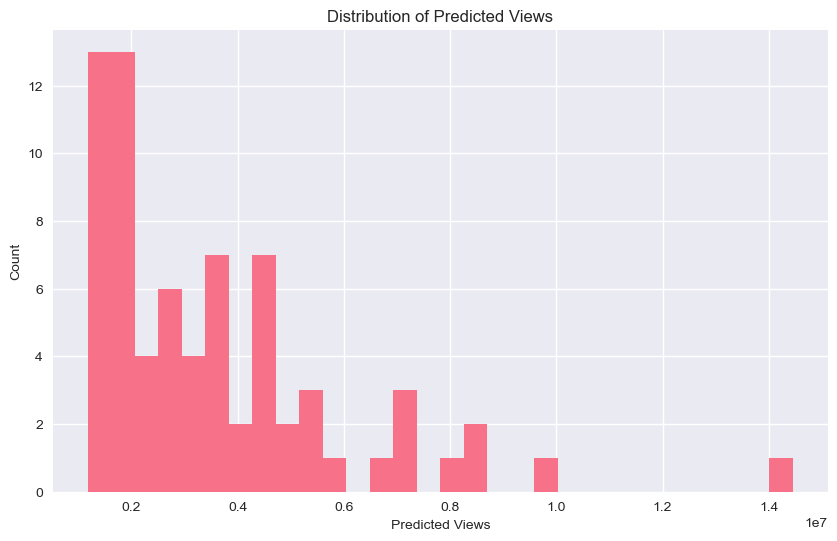

In [68]:

# Select the best model (Random Forest based on validation performance)
best_model = rf_model
predictions = best_model.predict(X_test_scaled)

# Create predictions DataFrame
predictions_df = pd.DataFrame({'Predicted_Views': predictions.astype(int)})
predictions_df.to_csv('video_views_predictions.csv', index=False)

print("\nFirst few predictions:")
print(predictions_df.head())

# Visualize prediction distribution
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=30)
plt.title('Distribution of Predicted Views')
plt.xlabel('Predicted Views')
plt.ylabel('Count')
plt.show()